# **Assignment 4**

In [ ]:
NAME = "Labib Ahmed Siddique"
ID = "18101478"
COLLABORATORS_ID = ["", ""]

In this assignment you will have to create the VGG-19 network from scratch, using the keras functional API and explore its usage for different tasks. [(The Functional API).](https://www.tensorflow.org/guide/keras/functional)
[Going through the *Setup* and *Introduction* sections of the previous tutorial will suffice if you haven't attended the live demo sessions.]

Read the VGG paper: [Very Deep Convolutional Networks for Large-Scale Image Recognition - Karen Simonyan, Andrew Zisserman](https://arxiv.org/abs/1409.1556) and complete the following tasks

## Task 1

Complete the following block to create a VGG19 network suitable for the ILSVRC classification task in keras and print the network's summary. (You don't have to train the network.)

[Hint: __Section 2 CONVNET CONFIGURATIONS__ of the paper contains necessary information about the network architecture of the VGG network. (Column E of Table 1 is the VGG19 network architecture.)]

In [1]:
# Import necessary libraries
import tensorflow as tf

In [3]:
inputs = tf.keras.Input(shape=(224, 224, 3), name="input_1")


block1_conv1 = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
block1_conv2 = tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same")(block1_conv1)
block1_pool = tf.keras.layers.MaxPooling2D(2)(block1_conv2)

block2_conv1 = tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same")(block1_pool)
block2_conv2 = tf.keras.layers.Conv2D(128, 3, activation="relu", padding="same")(block2_conv1)
block2_pool = tf.keras.layers.MaxPooling2D(2)(block2_conv2)

block3_conv1 = tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same")(block2_pool)
block3_conv2 = tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same")(block3_conv1)
block3_conv3 = tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same")(block3_conv2)
block3_conv4 = tf.keras.layers.Conv2D(256, 3, activation="relu", padding="same")(block3_conv3)
block3_pool = tf.keras.layers.MaxPooling2D(2)(block3_conv4)

block4_conv1 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block3_pool)
block4_conv2 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block4_conv1)
block4_conv3 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block4_conv2)
block4_conv4 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block4_conv3)
block4_pool = tf.keras.layers.MaxPooling2D(2)(block4_conv4)

block5_conv1 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block4_pool)
block5_conv2 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block5_conv1)
block5_conv3 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block5_conv2)
block5_conv4 = tf.keras.layers.Conv2D(512, 3, activation="relu", padding="same")(block5_conv3)
block5_pool = tf.keras.layers.MaxPooling2D(2)(block5_conv4)

flatten = tf.keras.layers.Flatten()(block5_pool)
fc1 = tf.keras.layers.Dense(4096, activation="relu")(flatten)
fc2 = tf.keras.layers.Dense(4096, activation="relu")(fc1)

outputs = tf.keras.layers.Dense(1000, activation="softmax")(fc2)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="VGG19")
model.summary()

Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 112, 112, 128)     147584    
                                                             

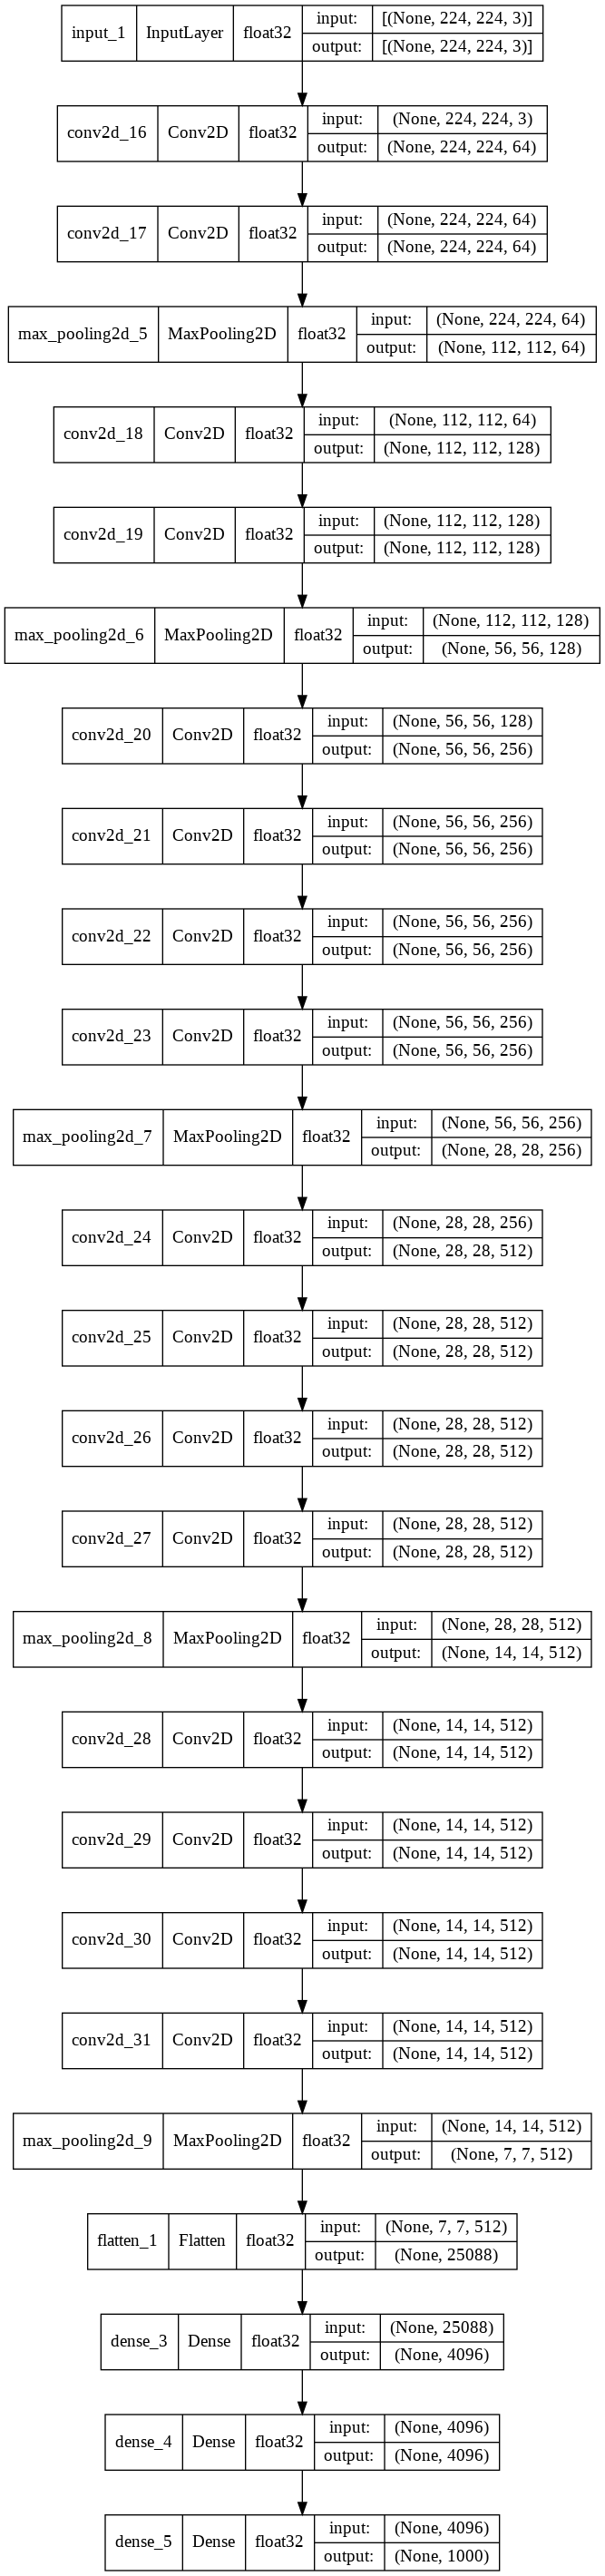

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

Your summary should match the following:
```
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_conv4 (Conv2D)        (None, 56, 56, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 28, 28, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 28, 28, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_conv4 (Conv2D)        (None, 28, 28, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 14, 14, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        (None, 14, 14, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 7, 7, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 4096)              102764544 
_________________________________________________________________
fc2 (Dense)                  (None, 4096)              16781312  
_________________________________________________________________
predictions (Dense)          (None, 1000)              4097000   
=================================================================
Total params: 143,667,240
Trainable params: 143,667,240
Non-trainable params: 0
_________________________________________________________________
```



## Task 2

What percentage of total parameters are in the fully connected layers?

86.062 %


## Task 3

The VGG19 network from task 1 contains a Dense (FC) output layer with 1000 units for the ILSVRC classification task. How could you modify the current output layer so that it is capable of classifying the CIFAR-100 dataset, which has a total number of 100 classes?

We can modify the output layer to classify 100 classes instead of 1000 by using transfer learning method and keep 100 units of densely connected neuron instead of 1000 units on the last layer


##Task 4

The VGG19 network from task 1 was designed for the ILSVRC classification challenge, but as we know there was a seperate challenge for image localisation. How could you modify the current ouput layer so that is suitable for the ILSVRC localisation task?

[Hint: __Section A LOCALISATION__ contains information about the localisation task.]

The current output layer needs to be removed then initialised and trained from scratch to predict bounding box location. If the output layer should be of 4D if the bounding box is shared across all classes. However, if the bounding box is class-specific, the output layer should be made to be of 4000-D.

## Task 5

The VGG19 network from task 1 was designed for the ILSVRC classification challenge. Explain how the authors proposed this deep network as a feature extractor for other computer vision tasks.
[Hint: __B GENERALISATION OF VERY DEEP FEATURES__ contains information about using the VGG network as a feature extractor.]

At first they removed the densely connected output layer and used 4096-D activations of the second last layer as image features which were aggregated across multiple locations and scales resulting into an image descriptor. The aggregation is done by firstly, rescaling the image, then the network is densely applied over the image plane resulting into a feature map. Performing global average pooling on this feature map produces a 4096-D image descriptor. The descriptor is then averaged with the descriptor of a horizontally flipped image. The resulting image descriptor is L2-normalized and combined with a linear SVM classifier and trained on the dataset keeping the pre-trained ConvNet weights fixed. Thus, multi-scale features are produced which can either be pooled or stacked across scales. A subsequent classifier can learn to combine image statistics in an optimal manner over a range of scales via stacking. Thus, the authors proposed this deep network as a feature extractor for other computer vision tasks.

### --THE END--